In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('D:/indian_food.csv')

In [3]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [43]:
df.shape

(254, 9)

In [6]:
df.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

In [44]:
df.course.unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [12]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [11]:
df=df.dropna()

In [23]:
df.diet.value_counts()

vegetarian        225
non vegetarian     29
Name: diet, dtype: int64

In [26]:
df[['name','prep_time']].max()

name         Zunka
prep_time      500
dtype: object

In [27]:
df.course.value_counts()

main course    129
dessert         84
snack           39
starter          2
Name: course, dtype: int64

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [50]:
df=df[df['state']!='-1']

In [52]:
df=df[df['region']!='-1']
df=df[df['flavor_profile'] != '-1'] 
df=df[df['course'] != '-1']
df=df[df['prep_time'] >= 1] 
df=df[df['cook_time'] >= 1] 

In [53]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [59]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['state'],
    marker_color='chocolate',
    opacity=1
))

fig.update_layout(
    title_text='STATE_DISTRIBUTION',
    xaxis_title_text='STATE',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    width=600,
    height=600
)

fig.show()

In [62]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['diet'],
    marker_color='BLUE',
    opacity=1
))

fig.update_layout(
    title_text='diet_DISTRIBUTION',
    xaxis_title_text='DIET',
    yaxis_title_text='COUNT', 
    bargap=0.8, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    width=600,
    height=600
)

fig.show()

In [63]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['flavor_profile'],
    marker_color='BLUE',
    opacity=1
))

fig.update_layout(
    title_text='flavor_profile',
    xaxis_title_text='flavor_profile',
    yaxis_title_text='COUNT', 
    bargap=0.8, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    width=600,
    height=600
)

fig.show()

In [65]:
import plotly.express as px

fig = px.line(df, x="diet", y="flavor_profile", title='Flavour_profile v/s Diet',
    width=600,
    height=600)
fig.show()

In [66]:
fig = px.scatter(df, x="flavor_profile", y="diet" ,color='diet',title="Flavour V/S Diet",
    width=600,
    height=600)
fig.show()

In [68]:
fig = px.scatter(df, x="name", y="state" ,color='state',title="State V/S Name",
    width=600,
    height=600)
fig.show()

In [73]:
fig = px.scatter(df, x="course", y="diet", color="course",  hover_data=['prep_time'] ,  size_max=50 ,
    width=600,
    height=600)
fig.show()

In [74]:
fig = px.scatter(df, x="name", y="diet", color="state",
                  hover_data=['state'] ,  size_max=40,
    width=600,
    height=600)
fig.show()

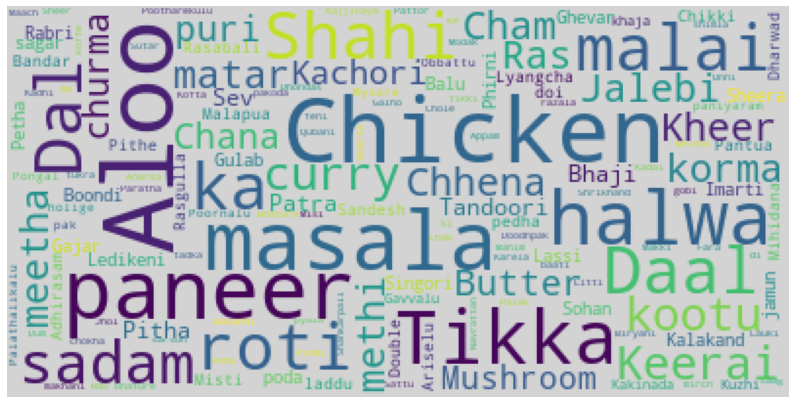

In [84]:
from wordcloud import WordCloud 
wordCloud = WordCloud(
    background_color='lightgrey',
    max_font_size = 50).generate(' '.join(df['name']))
plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [78]:
import sys
print(sys.executable)

C:\Users\vindh\anaconda3\python.exe


In [80]:
from wordcloud import WordCloud

In [87]:
pie_df=df['diet'].value_counts().reset_index()

In [100]:
pie_df

,diet,count
0,vegetarian,163
1,non vegetarian,17


In [99]:
pie_df.columns=['diet','count']

In [103]:
px.pie(pie_df,values='count',names='diet')

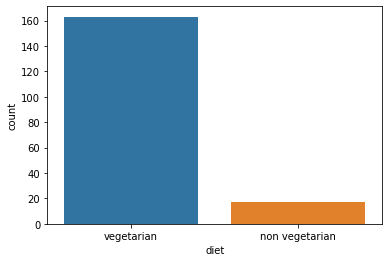

In [105]:
sns.countplot(x='diet',data=df)

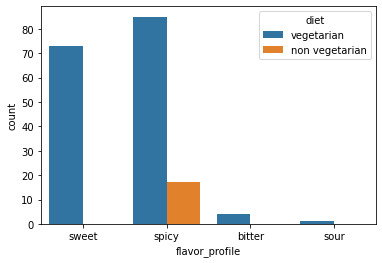

In [106]:
sns.countplot(x='flavor_profile',hue='diet',data=df)

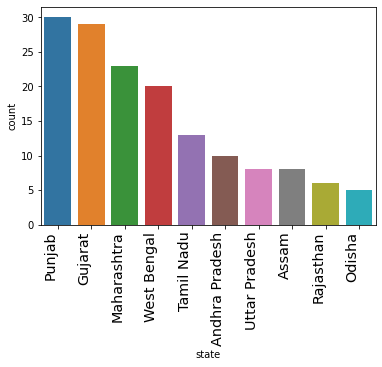

In [113]:
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.countplot(x='state',order=df['state'].value_counts().index[0:10] ,data=df)

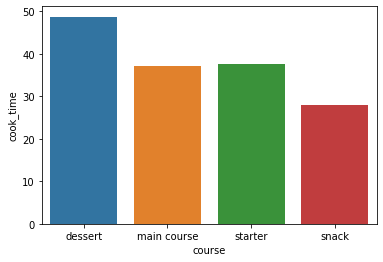

In [116]:
sns.barplot(x='course',y='cook_time',data=df,ci=None)

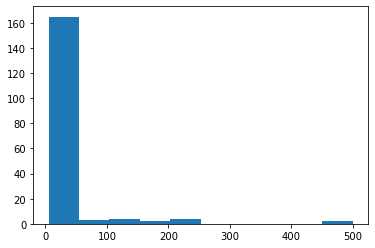

In [117]:
df['prep_time'].hist(grid=False)

In [134]:
top10=df.sort_values('cook_time',ascending=False).head(10).set_index('name')

In [135]:
top10

,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
name,,,,,,,,
Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West
Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10,120,sweet,dessert,Bihar,North
Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
Kuzhakkattai,"Sesame oil, raw rice, jaggery, grated coconut",vegetarian,10,90,spicy,main course,Tamil Nadu,South
Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",vegetarian,10,90,spicy,main course,Rajasthan,West
Rasgulla,"Chhena, sugar, cardamom",vegetarian,10,90,sweet,dessert,West Bengal,East
Ariselu,"Rice flour, jaggery, ghee",vegetarian,15,75,sweet,dessert,Andhra Pradesh,South
Fara,"Chana dal, whole wheat flour, arhar dal, white...",vegetarian,10,60,spicy,snack,Chhattisgarh,Central


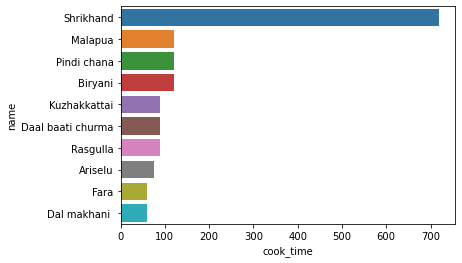

In [138]:
sns.barplot(x=top10['cook_time],y=top10.index)

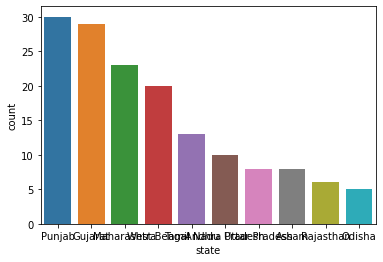

In [108]:
sns.countplot(x='state', order=df['state'].value_counts().index[0:10] ,data=df)

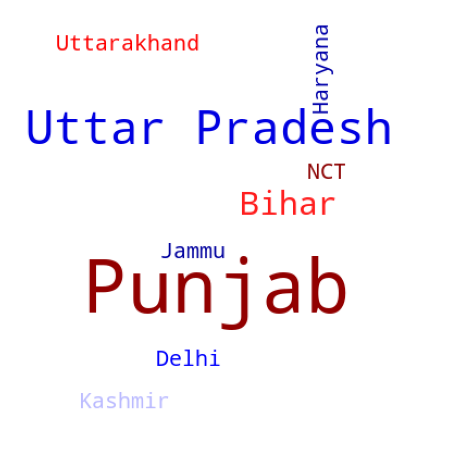

In [147]:
north = north.reset_index()
ingredients = []
for i in range(0,len(north)):
    text = north['state'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'seismic'
                      ,background_color ='white', 
                min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

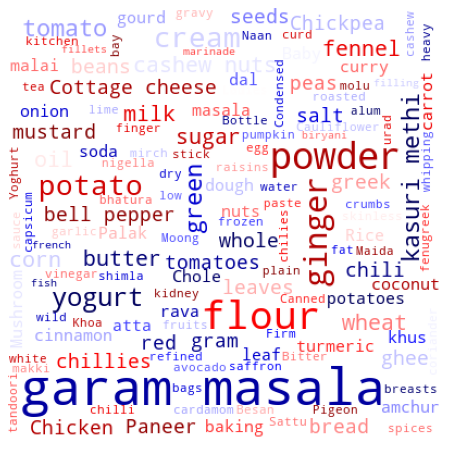

In [146]:
ingredients = []
for i in range(0,len(north)):
    text = north['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'seismic'
                      ,background_color ='white', 
                min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [148]:
text

'Punjab Uttar Pradesh Punjab Uttar Pradesh Uttar Pradesh Uttarakhand Uttar Pradesh Bihar Punjab Punjab Punjab Punjab Punjab Punjab Punjab NCT of Delhi Punjab Punjab Punjab Punjab Punjab Punjab Jammu & Kashmir Uttar Pradesh Punjab Haryana Punjab Uttar Pradesh Uttar Pradesh Bihar Punjab Punjab Punjab Punjab Uttar Pradesh Punjab Punjab Punjab Punjab Punjab Bihar Punjab Punjab Punjab Punjab'

In [142]:
north = north.reset_index()

In [140]:
north = df[(df['region']=='North')]

In [143]:
north

,index,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
1,6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
2,11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5,5,sweet,dessert,Punjab,North
3,13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
4,15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
5,17,Singori,"Khoa, coconut, molu leaf",vegetarian,10,20,sweet,dessert,Uttarakhand,North
6,18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
7,27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10,120,sweet,dessert,Bihar,North
8,68,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
9,69,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North


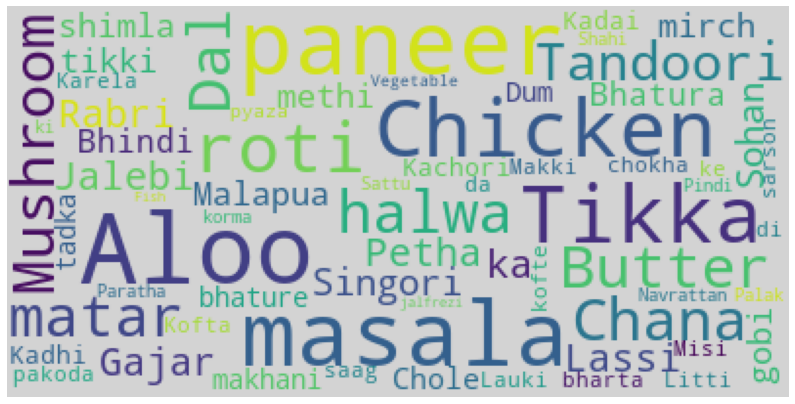

In [152]:
wordCloud = WordCloud(
    background_color='lightgrey',
    max_font_size = 50).generate(' '.join(north['name']))
plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [154]:
import numpy as np

In [150]:
north=pd.DataFrame(north)

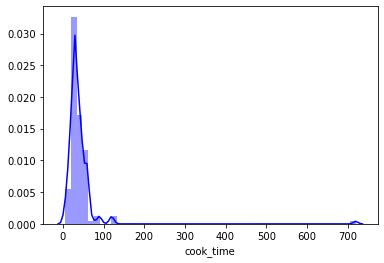

In [167]:
sns.distplot(df['cook_time'],color='blue')